<hr> 
Arthur Martins Ferreira de Sousa 

14783601
<hr>

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr>


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


<hr>

In [2]:
data = pd.read_csv("sneeze1.csv")
data = data.drop(columns=['Unnamed: 0'])
print(data.shape, "\n")
print(data.info(), "\n")
print(data.describe(), "\n")

(1200, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1200 non-null   int64  
 1   alcohol   1200 non-null   int64  
 2   antihist  1200 non-null   int64  
 3   smoker    1200 non-null   int64  
 4   age       1200 non-null   float64
 5   pollen    1200 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 56.4 KB
None 

           nsneeze      alcohol     antihist       smoker          age  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean     17.093333     0.299167     0.251667     0.189167    40.342500   
std      27.537245     0.458084     0.434152     0.391804    13.324469   
min       0.000000     0.000000     0.000000     0.000000    18.000000   
25%       5.000000     0.000000     0.000000     0.000000    31.000000   
50%      10.000000     0.000000     0.000000     0.000000    40.0000

In [3]:
data.head()

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172


Numa análise rápida e inicial, percebemos que as distribuições das variáveis contínuas idade e pólen dificilmente não são diferenciadas segundo outras features do conjunto de dados. Veja que entre aqueles que têm consumo de álcool ou não, uso de anti-histamínico ou não, e fumantes e não fumantes, essas classes são mal separadas entre si, e aqueles que apresentam a ocorrência do estado (indicados por 1) são minoria.

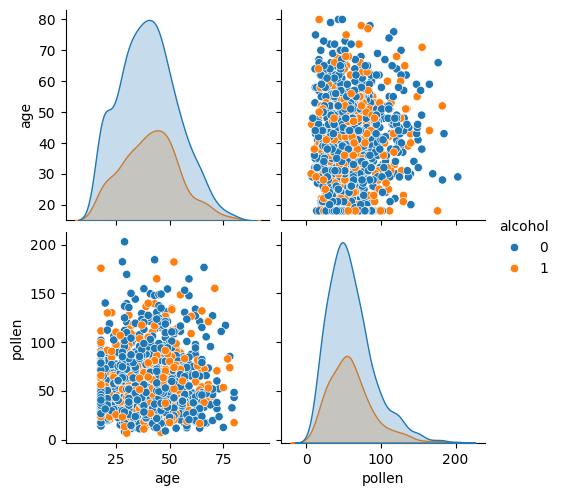

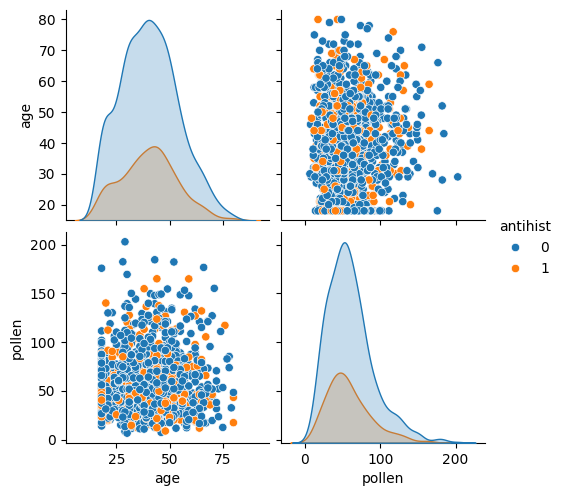

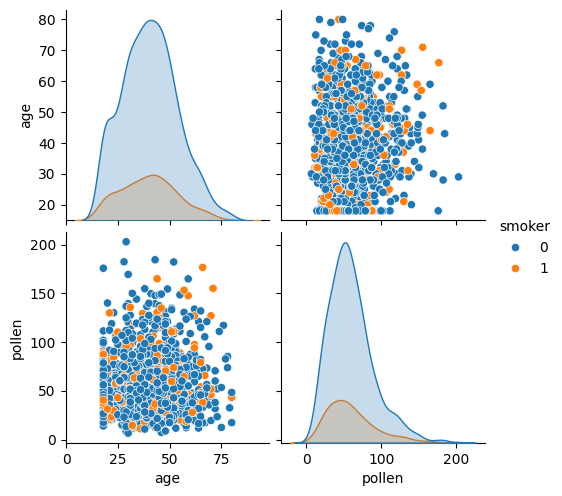

In [4]:
bin_cols = list(data.select_dtypes('int').drop(columns=['nsneeze']))

for bin_feature in bin_cols:
    sns.pairplot(data, vars=['age', 'pollen'], hue=bin_feature)
    plt.show()

A matriz de correlação indica que o número de espirros possui uma associação moderada e positiva com pollen (≈ 0.65), sugerindo que maiores concentrações de pólen estão relacionadas a mais espirros, enquanto a correlação com idade é praticamente nula ($\sim$ –0.05), indicando pouca influência linear da idade. Além disso, idade e pólen também não são correlacionados entre si, o que reduz preocupações com multicolinearidade.

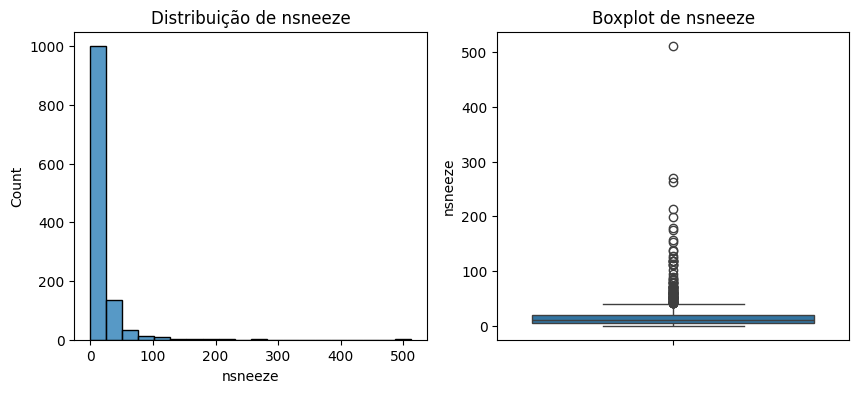

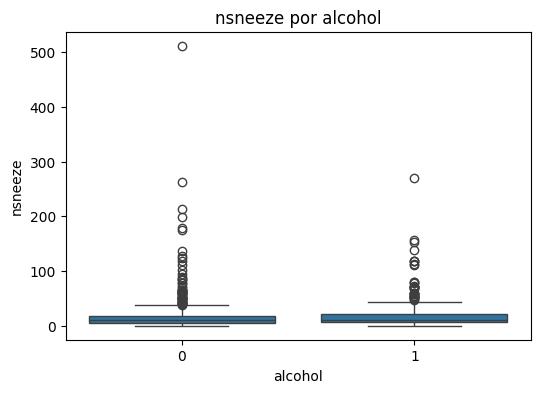

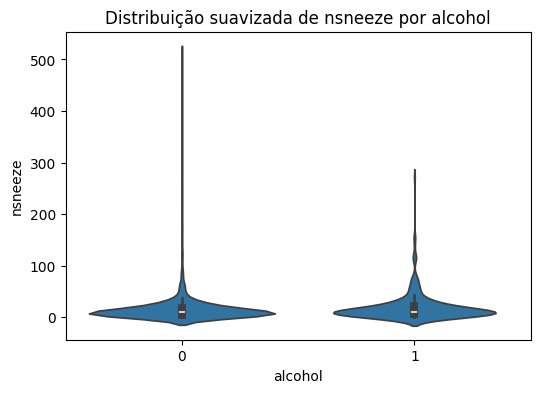

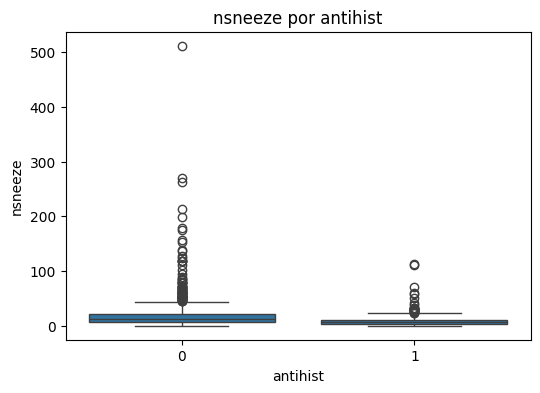

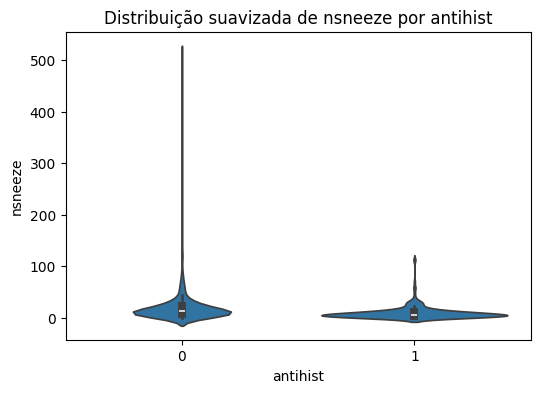

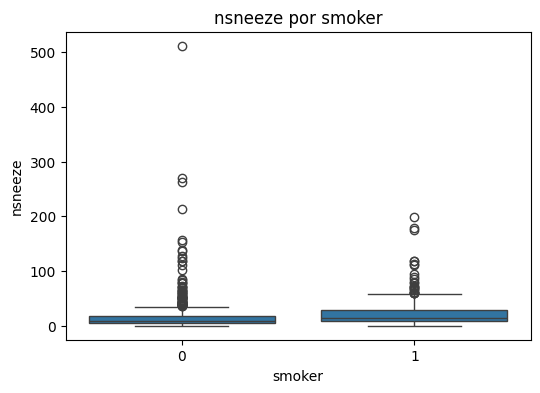

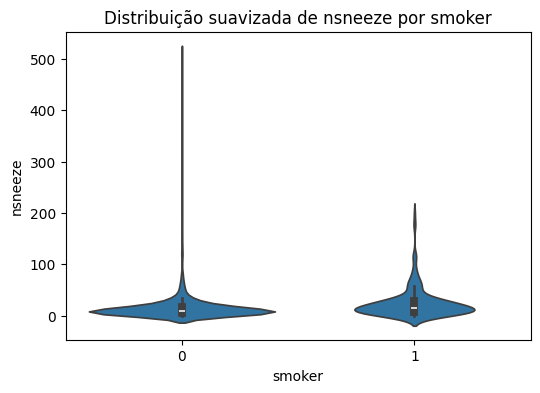

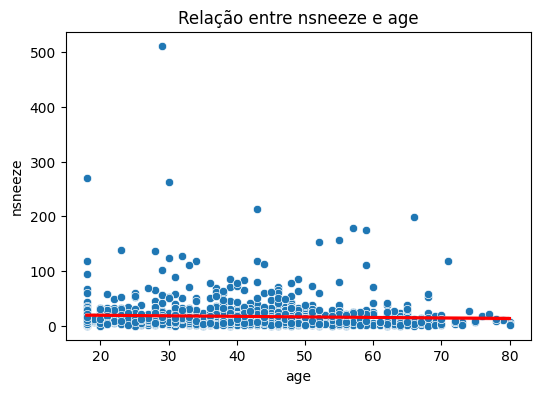

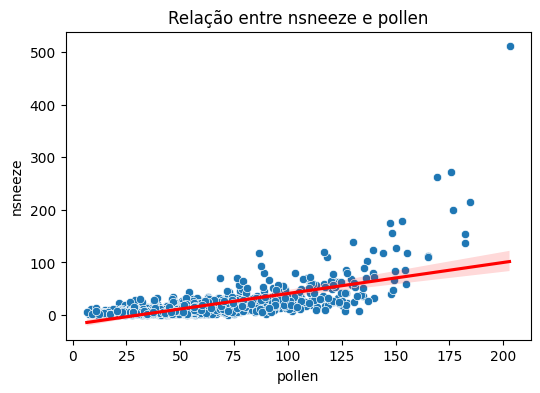


Correlação entre nsneeze e variáveis contínuas:

         nsneeze    age  pollen
nsneeze    1.000 -0.047   0.652
age       -0.047  1.000   0.051
pollen     0.652  0.051   1.000


In [5]:
binary_vars = ['alcohol', 'antihist', 'smoker']
continuous_vars = ['age', 'pollen']
response = 'nsneeze'

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data[response], kde=False, bins=20)
plt.title("Distribuição de nsneeze")

plt.subplot(1,2,2)
sns.boxplot(y=data[response])
plt.title("Boxplot de nsneeze")

plt.show()

for var in binary_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=var, y=response, data=data)
    plt.title(f"nsneeze por {var}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.violinplot(x=var, y=response, data=data)
    plt.title(f"Distribuição suavizada de nsneeze por {var}")
    plt.show()

for var in continuous_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=var, y=response, data=data)
    sns.regplot(x=var, y=response, data=data, scatter=False, color='red')
    plt.title(f"Relação entre nsneeze e {var}")
    plt.show()


print("\nCorrelação entre nsneeze e variáveis contínuas:\n")
print(data[[response] + continuous_vars].corr().round(3))

Dado que a covariável pollen apresenta correlação moderadamente positiva com a variável resposta, é interessante analisar o efeito de separar a distribuição de espirros por intervlos de nível de pólen. Veja que para níveis mais altos, entre 74 e 202 aproximadamente, a distribuição é mais assimétrica à direita. 

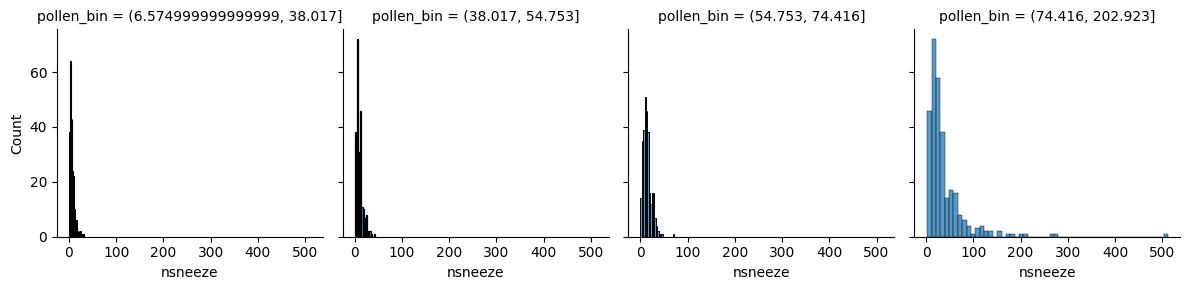

In [6]:
datac = data.copy()
datac['pollen_bin'] = pd.qcut(datac['pollen'], 4)
sns.FacetGrid(datac, col="pollen_bin").map(sns.histplot, "nsneeze")


<hr>

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


<hr>

O modelo de regressão de Poisson ajustado para explicar o número de espirros mostrou que todas as covariáveis são estatisticamente significativas ($p < 0.001$). O coeficiente positivo do álcool indica que consumir álcool está associado a um aumento na taxa esperada de espirros, enquanto que a ingestão de anti-histamínicos apresenta coeficiente negativo, sugerindo um efeito protetor coerente com o uso do medicamento. A variável fumante também aumenta a taxa de espirros, refletindo possível irritação respiratória adicional. Já a idade apresenta um pequeno coeficiente negativo, implicando que indivíduos mais velhos tendem a espirrar levemente menos. Por fim, pólen tem o maior impacto positivo, indicando que aumentos na concentração de pólen elevam fortemente a taxa esperada de espirros, como suspeito pela alta correlação. Como o modelo utiliza a função de ligação log, cada coeficiente pode ser interpretado como uma mudança proporcional na taxa: por exemplo, $e^{0.219} \approx 1.24$ para o álcool, indicando aumento de aproximadamente $24\%$, enquanto $e^{-0.645} \approx 0.52$ para anti-histamínico, sugerindo redução de cerca de $48\%$ no número de espirros.


In [7]:
resposta = data['nsneeze']
preditoras = data[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [9]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=data,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Sat, 29 Nov 2025   Deviance:                       4949.1
Time:                        16:17:16   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

Veja na tabela abaixo os números resumidos no parágrafo anterior, apresentados junto com seu intervalo de confiança interpretável para os coeficientes das covariáveis

\[

\begin{array}{lccc}
\hline
\textbf{Variável} & \textbf{Efeito}\ (e^{\beta}) & \textbf{IC\ 2.5\%} & \textbf{IC\ 97.5\%} \\
\hline
\text{Intercept}      & 4.74 & 4.51 & 4.99 \\
\text{Alcohol (=1)}   & 1.24 & 1.21 & 1.28 \\
\text{Antihist (=1)}  & 0.52 & 0.50 & 0.55 \\
\text{Smoker (=1)}    & 1.59 & 1.54 & 1.64 \\
\text{Age}            & 0.99 & 0.99 & 0.99 \\
\text{Pollen}         & 1.02 & 1.02 & 1.02 \\
\hline
\end{array}

\]



<hr>


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


<hr>

Em um modelo de Poisson corretamente especificado, espera-se que $\phi \approx 1$, pois a variância deve ser igual à média. Entretanto, o valor encontrado é mais de quatro vezes maior do que o esperado. Isso indica que a variabilidade observada no número de espirros é muito superior à variabilidade assumida pelo modelo de Poisson. Portanto, existe superdispersão acentuada.

In [10]:
import numpy as np

deviance = ajuste_pois.deviance
gl = ajuste_pois.df_resid
phi = deviance / gl

print("Parâmetro de dispersão", phi)


Parâmetro de dispersão 4.14498189596043


In [11]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

Agora observando o gráfico de envelope dos resíduos, nota-se que quase todas observações estão fora do envelope dos quantis, já que este intervalo é estreito, justificando, também, a superdispersão elevada para o modelo

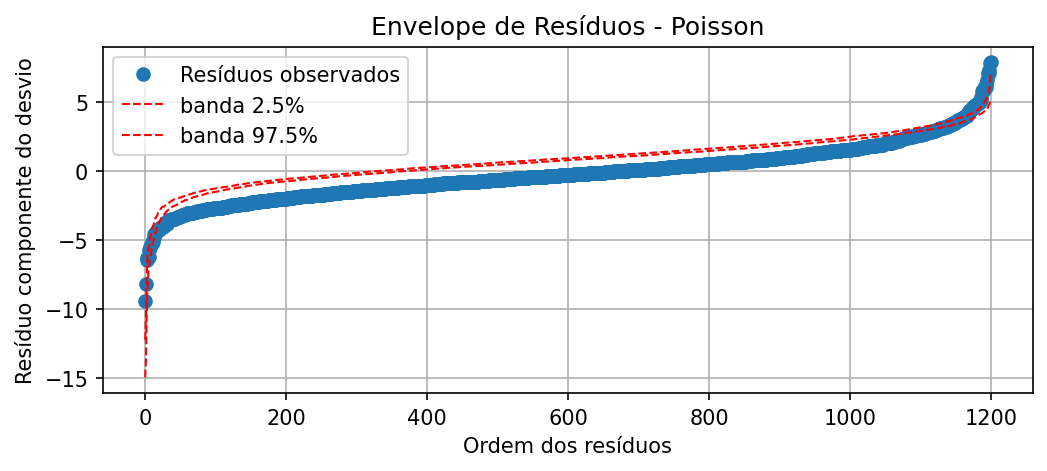

In [12]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

<hr>

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


<hr>

Como detectamos superdispersão pelo modelo Poisson, testemos um modelo Binomial Negativo de Contagem, com a mesma matriz de design e features

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.23

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=data,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3849.6
Date:                Sat, 29 Nov 2025   Deviance:                       1180.2
Time:                        16:17:16   Pearson chi2:                 1.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9259
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5624      0.062  

In [14]:
# Deviance e AIC
resumo_comparacao = pd.DataFrame({
    "Modelo": ["Poisson", "Binomial Negativa"],
    "Deviance": [ajuste_pois.deviance, ajuste_nb.deviance],
    "AIC": [ajuste_pois.aic, ajuste_nb.aic],
    "Pearson Chi²": [ajuste_pois.pearson_chi2, ajuste_nb.pearson_chi2]
})

resumo_comparacao


,Modelo,Deviance,AIC,Pearson Chi²
0,Poisson,4949.108384,9906.278039,5036.845446
1,Binomial Negativa,1180.212812,7711.282894,1131.205792


Os três critérios (Deviance, AIC e Pearson $Chi^2$) apontam de forma consistente que o modelo de Poisson sofre de superdispersão severa e, portanto, não é adequado para esses dados. A Binomial Negativa, por outro lado, ajusta muito melhor, reduzindo drasticamente a deviance e o Pearson $Chi^2$, além de apresentar um AIC muito menor, indicando que é o modelo apropriado para lidar com a variabilidade observada.

In [15]:
resid_dev_pois = ajuste_pois.resid_deviance
resid_dev_nb = ajuste_nb.resid_deviance

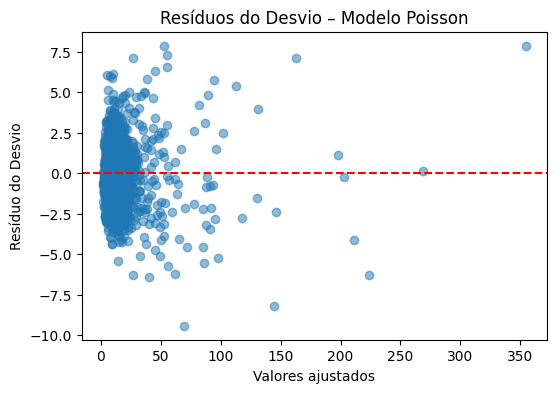

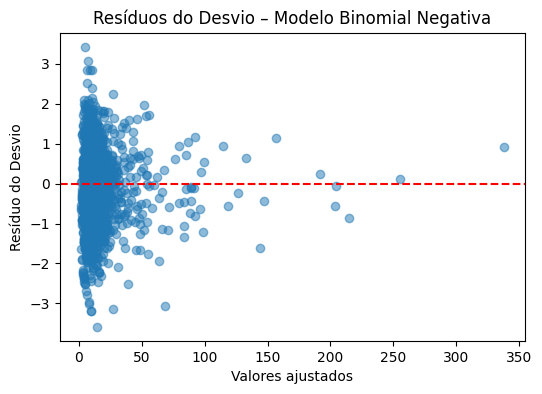

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(ajuste_pois.fittedvalues, resid_dev_pois, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos do Desvio – Modelo Poisson")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduo do Desvio")
plt.show()


plt.figure(figsize=(6,4))
plt.scatter(ajuste_nb.fittedvalues, resid_dev_nb, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos do Desvio – Modelo Binomial Negativa")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduo do Desvio")
plt.show()


No modelo Poisson, os resíduos apresentam grande dispersão e aumentam de variância conforme os valores ajustados crescem, indicando forte heterocedasticidade e confirmando a superdispersão já detectada pelos critérios numéricos.
Já no modelo Binomial Negativa, os resíduos ficam bem mais concentrados e mantêm variância aparentemente estável ao longo do ajuste, sugerindo um comportamento mais adequado para os dados.
Assim, os gráficos reforçam que o modelo de Binomial Negativa ajusta-se melhor aos dados do que o Poisson.

<hr>



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


<hr>

In [17]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


Pelos resultados do item **4** e o gráfico de envelopes abaixo, note que o modelo binomial negativo é mais adequado que o Poisson, dado que os resíduos encontram-se dentro dos envelopes.

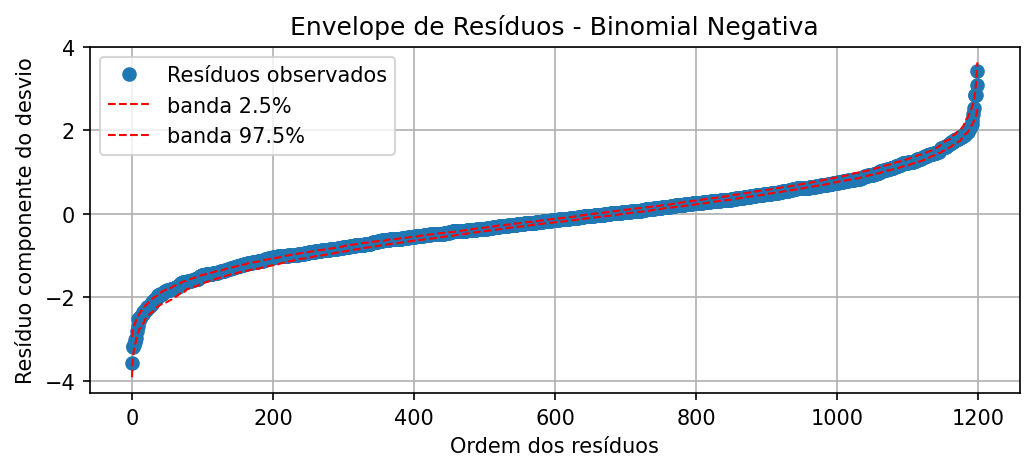

In [18]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [19]:
emm = ajuste_nb.get_margeff(at = 'overall', method = 'dydx', dummy = True)

print(emm.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      3.7788      0.669      5.649      0.000       2.468       5.090
C(antihist)[T.1]    -9.3827      0.521    -18.018      0.000     -10.403      -8.362
C(smoker)[T.1]       9.6788      0.957     10.118      0.000       7.804      11.554
age                 -0.1854      0.022     -8.380      0.000      -0.229      -0.142
pollen               0.3845      0.016     24.467      0.000       0.354       0.415


Os efeitos médios marginais estimados pelo modelo Binomial Negativa mostram o impacto absoluto de cada variável no número esperado de espirros. Consumir álcool aumenta, em média, $\approx$ 3.78 espirros por dia, enquanto o uso de anti-histamínico reduz cerca de $\approx$ 9.38 espirros, evidenciando forte efeito protetivo. Fumar adiciona em média $\approx$ 9.68 espirros, sendo o maior aumento entre as variáveis binárias. Para covariáveis contínuas, cada ano adicional de idade reduz o número esperado de espirros em cerca de 0.19, enquanto cada unidade adicional de concentração de pólen aumenta em torno de 0.38 espirros. Esses efeitos representam mudanças diretas na contagem média, mantendo todas as demais variáveis constantes.

<hr>

**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



<hr>

O modelo Binomial Negativo apresentou o melhor desempenho preditivo no teste, com MSE = $131.6$ e MAE = $6.62$, superando ligeiramente o Poisson (MSE = $149.8$, MAE = $6.83$) e muito superior ao baseline. Esses resultados estão alinhados com o ajuste no treino, em que o Binomial Negativo também teve valores menores de AIC ($5389.7$) e deviance ($837.9$) comparados ao Poisson (AIC = $6937.8$, deviance = $3475.9$). Assim, tanto as métricas de ajuste quanto as métricas preditivas confirmam que o Binomial Negativo é o modelo mais adequado.

Além disso, ao compararmos com o modelo baseline, que simplesmente prevê a média do conjunto de treinamento (MSE = $567.4$, MAE = $13.58$), fica claro que tanto o Poisson quanto, principalmente, o Binomial Negativo produzem predições muito superiores. Essa diferença reforça que os modelos realmente capturam estrutura relevante nos dados, e que o ganho observado não é trivial. Com isso, o Binomial Negativo se destaca como o melhor modelo tanto em ajuste quanto em capacidade preditiva fora da amostra.

                       Modelo  MSE_test  MAE_test  AIC_train  Deviance_train
0            Poisson (treino)  149.8424    6.8252  6937.7548       3475.8463
1  Binomial Negativa (treino)  131.6074    6.6245  5389.6668        837.8868
2     Baseline (média treino)  567.3777   13.5847        NaN             NaN

Resumo (melhor valor em negrito manual):
Poisson - MSE: 149.8424, MAE: 6.8252, AIC (treino): 6937.75, Deviance (treino): 3475.85
NegBin  - MSE: 131.6074, MAE: 6.6245, AIC (treino): 5389.67, Deviance (treino): 837.89
Baseline- MSE: 567.3777, MAE: 13.5847


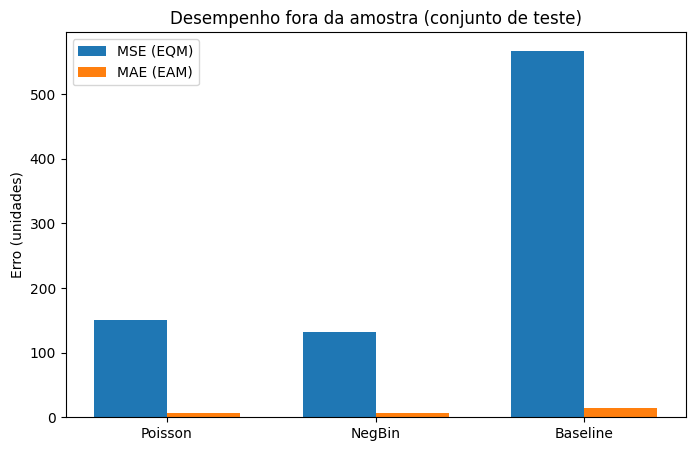

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

train, test = train_test_split(data, test_size=0.3, random_state=13, shuffle=True)

# Poisson
mod_pois_train = smf.glm(formula=formula, data=train, family=sm.families.Poisson()).fit()

# Binomial Negativa
mod_nb_train = smf.glm(formula=formula, data=train, family=sm.families.NegativeBinomial(alpha=0.23)).fit()

pred_pois_test = mod_pois_train.predict(test)  
pred_nb_test = mod_nb_train.predict(test)

# para referência, predição baseline = média do treino
baseline_pred = np.repeat(train['nsneeze'].mean(), len(test))

# Métricas
y_test = test['nsneeze'].values

mse_pois = mean_squared_error(y_test, pred_pois_test)
mae_pois = mean_absolute_error(y_test, pred_pois_test)

mse_nb = mean_squared_error(y_test, pred_nb_test)
mae_nb = mean_absolute_error(y_test, pred_nb_test)

mse_base = mean_squared_error(y_test, baseline_pred)
mae_base = mean_absolute_error(y_test, baseline_pred)

# Resultados
cmp_df = pd.DataFrame({
    'Modelo': ['Poisson (treino)', 'Binomial Negativa (treino)', 'Baseline (média treino)'],
    'MSE_test': [mse_pois, mse_nb, mse_base],
    'MAE_test': [mae_pois, mae_nb, mae_base],
    'AIC_train': [mod_pois_train.aic, mod_nb_train.aic, np.nan],
    'Deviance_train': [mod_pois_train.deviance, mod_nb_train.deviance, np.nan]
})

print(cmp_df.round(4))

# Resumo
print("\nResumo (melhor valor em negrito manual):")
print(f"Poisson - MSE: {mse_pois:.4f}, MAE: {mae_pois:.4f}, AIC (treino): {mod_pois_train.aic:.2f}, Deviance (treino): {mod_pois_train.deviance:.2f}")
print(f"NegBin  - MSE: {mse_nb:.4f}, MAE: {mae_nb:.4f}, AIC (treino): {mod_nb_train.aic:.2f}, Deviance (treino): {mod_nb_train.deviance:.2f}")
print(f"Baseline- MSE: {mse_base:.4f}, MAE: {mae_base:.4f}")

# Gráficos

plt.figure(figsize=(8,5))
labels = ['Poisson', 'NegBin', 'Baseline']
mse_vals = [mse_pois, mse_nb, mse_base]
mae_vals = [mae_pois, mae_nb, mae_base]

x = np.arange(len(labels))
width = 0.35
plt.bar(x - width/2, mse_vals, width, label='MSE (EQM)')
plt.bar(x + width/2, mae_vals, width, label='MAE (EAM)')
plt.xticks(x, labels)
plt.ylabel('Erro (unidades)')
plt.title('Desempenho fora da amostra (conjunto de teste)')
plt.legend()
plt.show()


<hr>

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

<hr>

Utilizando o modelo Binomial Negativo e quantis a critério de baixa e alta concentração de pólen, como explicitado no código:

In [21]:

pollen_low = data['pollen'].quantile(0.1)   # baixa concentração
pollen_high = data['pollen'].quantile(0.9)  # alta concentração

# Criar DataFrame com os dois perfis
novos_individuos = pd.DataFrame({
    'alcohol':  [0, 1],
    'antihist': [1, 0],
    'smoker':   [0, 1],
    'age':      [30, 50],
    'pollen':   [pollen_low, pollen_high]
})

novos_individuos.index = ['Indivíduo A', 'Indivíduo B']

# Previsões do número esperado de espirros
predicoes = ajuste_nb.predict(novos_individuos)

print("Previsões de espirros esperados:")
print(predicoes)


Previsões de espirros esperados:
Indivíduo A     3.098212
Indivíduo B    52.762878
dtype: float64
